In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For regression 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# For converting categorical values to numerical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# For splitting and scaling 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Fore dimentionality reduction
from sklearn.decomposition import PCA

# For classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# For hyperparameter tunning
from sklearn.model_selection import RandomizedSearchCV

# For evaluation of metrics
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\User\Kaggle comp\autos.csv',encoding = "latin-1")
print('Shape = ', df.shape)
df.head(10)

Shape =  (371541, 20)


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,24-03-2016 11:52,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993.0,manuell,0.0,golf,150000,0.0,benzin,volkswagen,NaN,24-03-2016 00:00,0.0,70435.0,07-04-2016 03:16
1,24-03-2016 10:58,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190.0,NaN,125000,5.0,diesel,audi,ja,24-03-2016 00:00,0.0,66954.0,07-04-2016 01:46
2,14-03-2016 12:52,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800.0,test,suv,2004.0,automatik,163.0,grand,125000,8.0,diesel,jeep,NaN,14-03-2016 00:00,0.0,90480.0,05-04-2016 12:47
3,17-03-2016 16:54,GOLF_4_1_4__3TÜRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75.0,golf,150000,6.0,benzin,volkswagen,nein,17-03-2016 00:00,0.0,91074.0,17-03-2016 17:40
4,31-03-2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69.0,fabia,90000,7.0,diesel,skoda,nein,31-03-2016 00:00,0.0,60437.0,06-04-2016 10:17
5,04-04-2016 17:36,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650.0,test,limousine,1995.0,manuell,102.0,3er,150000,10.0,benzin,bmw,ja,04-04-2016 00:00,0.0,33775.0,06-04-2016 19:17
6,01-04-2016 20:48,Peugeot_206_CC_110_Platinum,privat,Angebot,2200.0,test,cabrio,2004.0,manuell,109.0,2_reihe,150000,8.0,benzin,peugeot,nein,01-04-2016 00:00,0.0,67112.0,05-04-2016 18:18
7,21-03-2016 18:54,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0.0,test,limousine,1980.0,manuell,50.0,andere,40000,7.0,benzin,volkswagen,nein,21-03-2016 00:00,0.0,19348.0,25-03-2016 16:47
8,04-04-2016 23:42,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500.0,control,bus,2014.0,manuell,125.0,c_max,30000,8.0,benzin,ford,NaN,04-04-2016 00:00,0.0,94505.0,04-04-2016 23:42
9,17-03-2016 10:53,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Angebot,999.0,test,kleinwagen,1998.0,manuell,101.0,golf,150000,0.0,NaN,volkswagen,NaN,17-03-2016 00:00,0.0,27472.0,31-03-2016 17:17


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371541 entries, 0 to 371540
Data columns (total 20 columns):
dateCrawled            371538 non-null object
name                   371540 non-null object
seller                 371538 non-null object
offerType              371538 non-null object
price                  371538 non-null float64
abtest                 371538 non-null object
vehicleType            333669 non-null object
yearOfRegistration     371537 non-null float64
gearbox                351329 non-null object
powerPS                371538 non-null float64
model                  351054 non-null object
kilometer              371538 non-null object
monthOfRegistration    371537 non-null float64
fuelType               338151 non-null object
brand                  371537 non-null object
notRepairedDamage      299477 non-null object
dateCreated            371537 non-null object
nrOfPictures           371537 non-null float64
postalCode             371537 non-null float64
lastSeen 

In [4]:
df.isnull().sum()

dateCrawled                3
name                       1
seller                     3
offerType                  3
price                      3
abtest                     3
vehicleType            37872
yearOfRegistration         4
gearbox                20212
powerPS                    3
model                  20487
kilometer                  3
monthOfRegistration        4
fuelType               33390
brand                      4
notRepairedDamage      72064
dateCreated                4
nrOfPictures               4
postalCode                 4
lastSeen                   4
dtype: int64

In [5]:
df = df.drop(['dateCrawled', 'dateCreated', 'nrOfPictures', 'lastSeen'], axis = 'columns')

In [6]:
df.head()

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993.0,manuell,0.0,golf,150000,0.0,benzin,volkswagen,NaN,70435.0
1,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190.0,NaN,125000,5.0,diesel,audi,ja,66954.0
2,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800.0,test,suv,2004.0,automatik,163.0,grand,125000,8.0,diesel,jeep,NaN,90480.0
3,GOLF_4_1_4__3TÜRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75.0,golf,150000,6.0,benzin,volkswagen,nein,91074.0
4,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69.0,fabia,90000,7.0,diesel,skoda,nein,60437.0


In [7]:
df['seller'].value_counts()

privat        371534
gewerblich         3
golf               1
Name: seller, dtype: int64

In [8]:
df['offerType'].value_counts()

Angebot    371525
Gesuch         12
150000          1
Name: offerType, dtype: int64

In [9]:
df['abtest'].value_counts()

test       192591
control    178946
benzin          1
Name: abtest, dtype: int64

In [10]:
df = df.drop(['seller', 'offerType'], axis = 'columns')
df.head()

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,Golf_3_1.6,480.0,test,NaN,1993.0,manuell,0.0,golf,150000,0.0,benzin,volkswagen,NaN,70435.0
1,A5_Sportback_2.7_Tdi,18300.0,test,coupe,2011.0,manuell,190.0,NaN,125000,5.0,diesel,audi,ja,66954.0
2,"Jeep_Grand_Cherokee_""Overland""",9800.0,test,suv,2004.0,automatik,163.0,grand,125000,8.0,diesel,jeep,NaN,90480.0
3,GOLF_4_1_4__3TÜRER,1500.0,test,kleinwagen,2001.0,manuell,75.0,golf,150000,6.0,benzin,volkswagen,nein,91074.0
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600.0,test,kleinwagen,2008.0,manuell,69.0,fabia,90000,7.0,diesel,skoda,nein,60437.0


In [11]:
df['abtest'].isnull().sum()

3

In [12]:
df['abtest'] = df['abtest'].fillna('test')

In [13]:
df['abtest'] = df['abtest'].replace('benzin', 'test')

In [14]:
df['abtest'].value_counts()

test       192595
control    178946
Name: abtest, dtype: int64

In [15]:
df['abtest'] = df['abtest'].replace({'test':1, 'control': 2})

In [16]:
df['abtest'].value_counts()

1    192595
2    178946
Name: abtest, dtype: int64

In [17]:
df['vehicleType'].value_counts()

limousine     95896
kleinwagen    80026
kombi         67564
bus           30202
cabrio        22899
coupe         19016
suv           14708
andere         3357
volkswagen        1
Name: vehicleType, dtype: int64

In [18]:
df['vehicleType'].unique()

array([nan, 'coupe', 'suv', 'kleinwagen', 'limousine', 'cabrio', 'bus',
       'kombi', 'andere', 'volkswagen'], dtype=object)

In [19]:
df['vehicleType'].isnull().sum()


37872

In [20]:
df['vehicleType'] = df['vehicleType'].fillna(0)

In [21]:
df['vehicleType'] = df['vehicleType'].replace({'limousine':1, 'kleinwagen':2, 'kombi':3, 'bus':4, 'cabrio':5, 'coupe':6, 'suv':7, 'andere':8,'volkswagen':9})

In [22]:
df['vehicleType'].value_counts()

1    95896
2    80026
3    67564
0    37872
4    30202
5    22899
6    19016
7    14708
8     3357
9        1
Name: vehicleType, dtype: int64

In [23]:
df['gearbox'].value_counts()

manuell             274219
automatik            77109
25-03-2016 00:00         1
Name: gearbox, dtype: int64

In [24]:
df['gearbox'] = df['gearbox'].replace('25-03-2016 00:00', 'manuell')

In [25]:
df['gearbox'] = df['gearbox'].fillna(0)

In [26]:
df['gearbox'] = df['gearbox'].replace({'manuell':1, 'automatik': 2}) 

In [27]:
df['gearbox'].unique()

array([1, 2, 0], dtype=int64)

In [28]:
df['powerPS'].value_counts().head(10)

0.0      40822
75.0     24035
60.0     15907
150.0    15442
140.0    13585
101.0    13313
90.0     12749
116.0    11963
170.0    10983
105.0    10429
Name: powerPS, dtype: int64

In [29]:
df['powerPS'] = df['powerPS'].fillna(0.0)

In [30]:
df['powerPS'].isnull().sum()

0

In [31]:
df['model'].value_counts().head()

golf      30070
andere    26404
3er       20567
polo      13092
corsa     12573
Name: model, dtype: int64

In [32]:
df['model'].value_counts().tail()

rangerover         6
serie_3            4
serie_1            2
discovery_sport    1
48429              1
Name: model, dtype: int64

In [33]:
df['model'].isnull().sum()

20487

In [34]:
df['model'] = df['model'].replace('48429', 'golf')

In [35]:
df['model'] = df['model'].fillna(0)

In [36]:
df['model'].value_counts().head()

golf      30071
andere    26404
3er       20567
0         20487
polo      13092
Name: model, dtype: int64

In [37]:
df['fuelType'].value_counts()

benzin     223863
diesel     107748
lpg          5378
cng           571
hybrid        279
andere        208
elektro       104
Name: fuelType, dtype: int64

In [38]:
df['fuelType'].isnull().sum()

33390

In [39]:
df['fuelType'] = df['fuelType'].fillna(0.0)

In [40]:
df['fuelType'] = df['fuelType'].replace({'benzin':1, 'diesel':2, 'lpg':3, 'cng':4, 'hybrid': 5, 'andere':6, 'elektro':7})

In [41]:
df['fuelType'].value_counts()

1.0    223863
2.0    107748
0.0     33390
3.0      5378
4.0       571
5.0       279
6.0       208
7.0       104
Name: fuelType, dtype: int64

In [42]:
df['brand'].value_counts()

volkswagen        79640
bmw               40274
opel              40136
mercedes_benz     35313
audi              32873
ford              25574
renault           17971
peugeot           11027
fiat               9676
seat               7022
mazda              5695
skoda              5641
smart              5249
citroen            5182
nissan             5037
toyota             4695
sonstige_autos     3982
hyundai            3646
mini               3394
volvo              3327
mitsubishi         3061
honda              2836
kia                2555
alfa_romeo         2345
suzuki             2328
porsche            2215
chevrolet          1845
chrysler           1452
dacia               900
jeep                807
daihatsu            806
subaru              779
land_rover          771
jaguar              621
trabant             591
daewoo              542
saab                530
rover               490
lancia              484
lada                225
Name: brand, dtype: int64

In [43]:
df['brand'].isnull().sum()

4

In [44]:
df['brand'] = df['brand'].fillna('volkswagen')

In [45]:
df['notRepairedDamage'].value_counts()

nein    263189
ja       36288
Name: notRepairedDamage, dtype: int64

In [46]:
df['notRepairedDamage'].unique()

array([nan, 'ja', 'nein'], dtype=object)

In [47]:
df['notRepairedDamage'].isnull().sum()

72064

In [48]:
df['notRepairedDamage'] = df['notRepairedDamage'].fillna(0.0)

In [49]:
df['notRepairedDamage'] = df['notRepairedDamage'].replace({'nein':1, 'ja': 2})

In [50]:
df['notRepairedDamage'].value_counts()

1.0    263189
0.0     72064
2.0     36288
Name: notRepairedDamage, dtype: int64

In [51]:
df['postalCode'].value_counts().head()

10115.0    828
65428.0    637
66333.0    349
38518.0    326
44145.0    323
Name: postalCode, dtype: int64

In [52]:
df['postalCode'].isnull().sum()

4

In [53]:
df['postalCode'] = df['postalCode'].fillna(10115.0)

In [54]:
df = df.drop('name', axis = 'columns')

In [55]:
df.head(10)

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,480.0,1,0,1993.0,1,0.0,golf,150000,0.0,1.0,volkswagen,0.0,70435.0
1,18300.0,1,6,2011.0,1,190.0,0,125000,5.0,2.0,audi,2.0,66954.0
2,9800.0,1,7,2004.0,2,163.0,grand,125000,8.0,2.0,jeep,0.0,90480.0
3,1500.0,1,2,2001.0,1,75.0,golf,150000,6.0,1.0,volkswagen,1.0,91074.0
4,3600.0,1,2,2008.0,1,69.0,fabia,90000,7.0,2.0,skoda,1.0,60437.0
5,650.0,1,1,1995.0,1,102.0,3er,150000,10.0,1.0,bmw,2.0,33775.0
6,2200.0,1,5,2004.0,1,109.0,2_reihe,150000,8.0,1.0,peugeot,1.0,67112.0
7,0.0,1,1,1980.0,1,50.0,andere,40000,7.0,1.0,volkswagen,1.0,19348.0
8,14500.0,2,4,2014.0,1,125.0,c_max,30000,8.0,1.0,ford,0.0,94505.0
9,999.0,1,2,1998.0,1,101.0,golf,150000,0.0,0.0,volkswagen,0.0,27472.0


In [56]:
le = LabelEncoder()

In [57]:
df['brand'] = le.fit_transform(df['brand'])

In [58]:
df['model'] = df['model'].replace(0, 'golf')

In [59]:
df['model'].value_counts()

golf                  50558
andere                26404
3er                   20567
polo                  13092
corsa                 12573
astra                 10830
passat                10306
a4                    10257
c_klasse               8776
5er                    8546
e_klasse               7561
a3                     6604
a6                     6023
focus                  5950
fiesta                 5776
transporter            5528
twingo                 4953
2_reihe                4816
fortwo                 4338
a_klasse               4317
vectra                 4255
1er                    3837
mondeo                 3626
clio                   3554
touran                 3540
3_reihe                3503
punto                  3349
zafira                 3049
megane                 2927
ka                     2702
                      ...  
mii                      81
crossfire                66
range_rover_evoque       65
gl                       64
nubira              

In [60]:
df['price'] = le.fit_transform(df['price'])

In [61]:
df['model'] = le.fit_transform(df['model'])

In [62]:
df['kilometer'].isnull().sum()

3

In [63]:
df['kilometer'].value_counts()

150000              219435
125000               34673
150000               21367
100000               14517
90000                11457
80000                10054
70000                 8954
60000                 7910
50000                 6977
5000                  6443
40000                 5841
30000                 5530
20000                 5205
125000                3394
10000                 1776
100000                1403
90000                 1067
80000                  999
70000                  819
60000                  759
50000                  639
5000                   627
40000                  536
30000                  511
20000                  471
10000                  173
30-03-2016 00:44         1
Name: kilometer, dtype: int64

In [64]:
df['kilometer'] = df['kilometer'].fillna(150000)

In [65]:
df['kilometer'] = df['kilometer'].replace('30-03-2016 00:44', 150000)

In [66]:
df['kilometer'].isnull().sum()

0

In [67]:
df['kilometer'].unique()

array([150000, 125000, 90000, 40000, 30000, 70000, 5000, 100000, 60000,
       20000, 80000, 50000, 10000, '150000', '125000', '30000', '5000',
       '20000', '40000', '100000', '90000', '50000', '70000', '60000',
       '80000', '10000'], dtype=object)

In [68]:
df['powerPS'] = le.fit_transform(df['powerPS'])
df['monthOfRegistration'] = le.fit_transform(df['monthOfRegistration'])


In [69]:
df['fuelType'] = le.fit_transform(df['fuelType'])
df['notRepairedDamage'] = le.fit_transform(df['notRepairedDamage'])

In [70]:
df.head(10)

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,256,1,0,1993.0,1,0,118,150000,0,1,38,0,70435.0
1,3587,1,6,2011.0,1,190,118,125000,5,2,1,2,66954.0
2,2590,1,7,2004.0,2,163,119,125000,8,2,14,0,90480.0
3,696,1,2,2001.0,1,75,118,150000,6,1,38,1,91074.0
4,1333,1,2,2008.0,1,69,103,90000,7,2,31,1,60437.0
5,339,1,1,1995.0,1,102,11,150000,10,1,2,2,33775.0
6,923,1,5,2004.0,1,109,8,150000,8,1,25,1,67112.0
7,0,1,1,1980.0,1,50,40,40000,7,1,38,1,19348.0
8,3215,2,4,2014.0,1,125,61,30000,8,1,10,0,94505.0
9,501,1,2,1998.0,1,101,118,150000,0,0,38,0,27472.0


In [71]:
IQR = df.yearOfRegistration.quantile(0.75) - df.yearOfRegistration.quantile(0.25)
IQR

9.0

In [72]:
df.yearOfRegistration.describe()

count    371537.000000
mean       2004.577883
std          92.865496
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: yearOfRegistration, dtype: float64

In [73]:
upper_fence = df.yearOfRegistration.quantile(0.75) + (IQR*1.5)
lower_fence = df.yearOfRegistration.quantile(0.25) - (IQR*1.5)
print(upper_fence, lower_fence)

2021.5 1985.5


In [74]:
Upper_fence = df.yearOfRegistration.quantile(0.75) + (IQR * 3)
Lower_fence = df.yearOfRegistration.quantile(0.25) - (IQR * 3)
print(Upper_fence, Lower_fence)

2035.0 1972.0


In [75]:
df[df['yearOfRegistration'] > 2035].shape

(114, 13)

In [76]:
df[df['yearOfRegistration'] < 1972].shape

(2309, 13)

In [77]:
outliers = [x for x in df.yearOfRegistration if x < lower_fence or x > upper_fence]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 7146


In [78]:
outliers_removed = [x for x in df.yearOfRegistration if x >= lower_fence and x <= upper_fence]
print('Non-outlier observations: %d' % len(outliers_removed))

Non-outlier observations: 364391


In [79]:
df.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,256,1,0,1993.0,1,0,118,150000,0,1,38,0,70435.0
1,3587,1,6,2011.0,1,190,118,125000,5,2,1,2,66954.0
2,2590,1,7,2004.0,2,163,119,125000,8,2,14,0,90480.0
3,696,1,2,2001.0,1,75,118,150000,6,1,38,1,91074.0
4,1333,1,2,2008.0,1,69,103,90000,7,2,31,1,60437.0


In [80]:
df['yearOfRegistration'].isnull().sum()

4

In [81]:
df['yearOfRegistration'] = df['yearOfRegistration'].fillna(2000.0)

In [82]:
a = df.groupby(['price', 'brand', 'model'])
a.first().head()

abtest  vehicleType  yearOfRegistration  gearbox  powerPS  \
price brand model                                                              
0     0     1           1            1              2002.0        0        0   
            2           1            7              2005.0        1      105   
            3           1            1              1999.0        1      155   
            4           2            0              2005.0        0        0   
            40          2            6              2005.0        0        0   

                  kilometer  monthOfRegistration  fuelType  notRepairedDamage  \
price brand model                                                               
0     0     1        150000                    1         2                  0   
            2        150000                    0         0                  0   
            3        150000                    0         1                  0   
            4         20000                    0         0                  0   
            40       150000                    2         0                  2   

                   postalCode  
price brand model              
0     0     1         52062.0  
            2         92431.0  
            3         89604.0  
            4         19205.0  
            40        68165.0

abtest
1    192595
2    178946
Name: abtest, dtype: int64


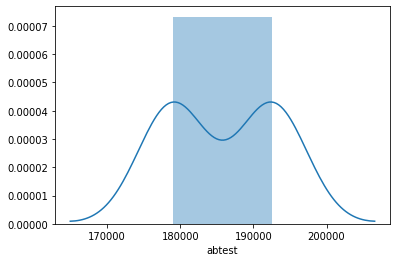

gearbox
1    274220
2     77109
0     20212
Name: gearbox, dtype: int64


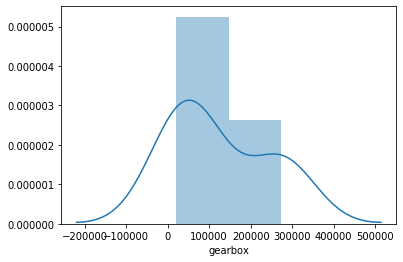

brand
38    79644
2     40274
24    40136
20    35313
1     32873
Name: brand, dtype: int64


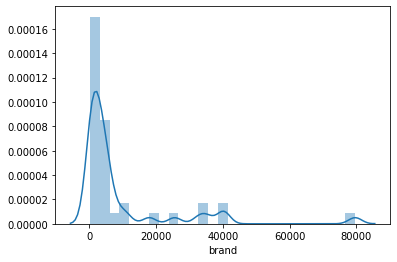

vehicleType
1    95896
2    80026
3    67564
0    37872
4    30202
Name: vehicleType, dtype: int64


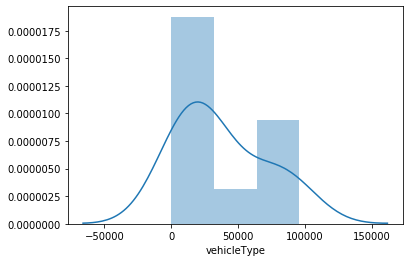

fuelType
1    223863
2    107748
0     33390
3      5378
4       571
Name: fuelType, dtype: int64


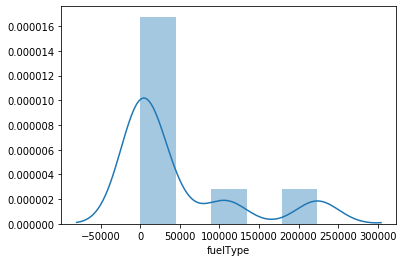

notRepairedDamage
1    263189
0     72064
2     36288
Name: notRepairedDamage, dtype: int64


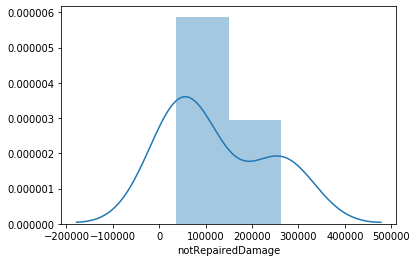

In [83]:
categories = ['abtest','gearbox', 'brand', 'vehicleType', 'fuelType', 'notRepairedDamage']

for i, c in enumerate(categories):
    v = df[c].unique()
    
    
    g = df.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))
    print( g.head())
    sns.distplot(g, kde = True)
    plt.show()


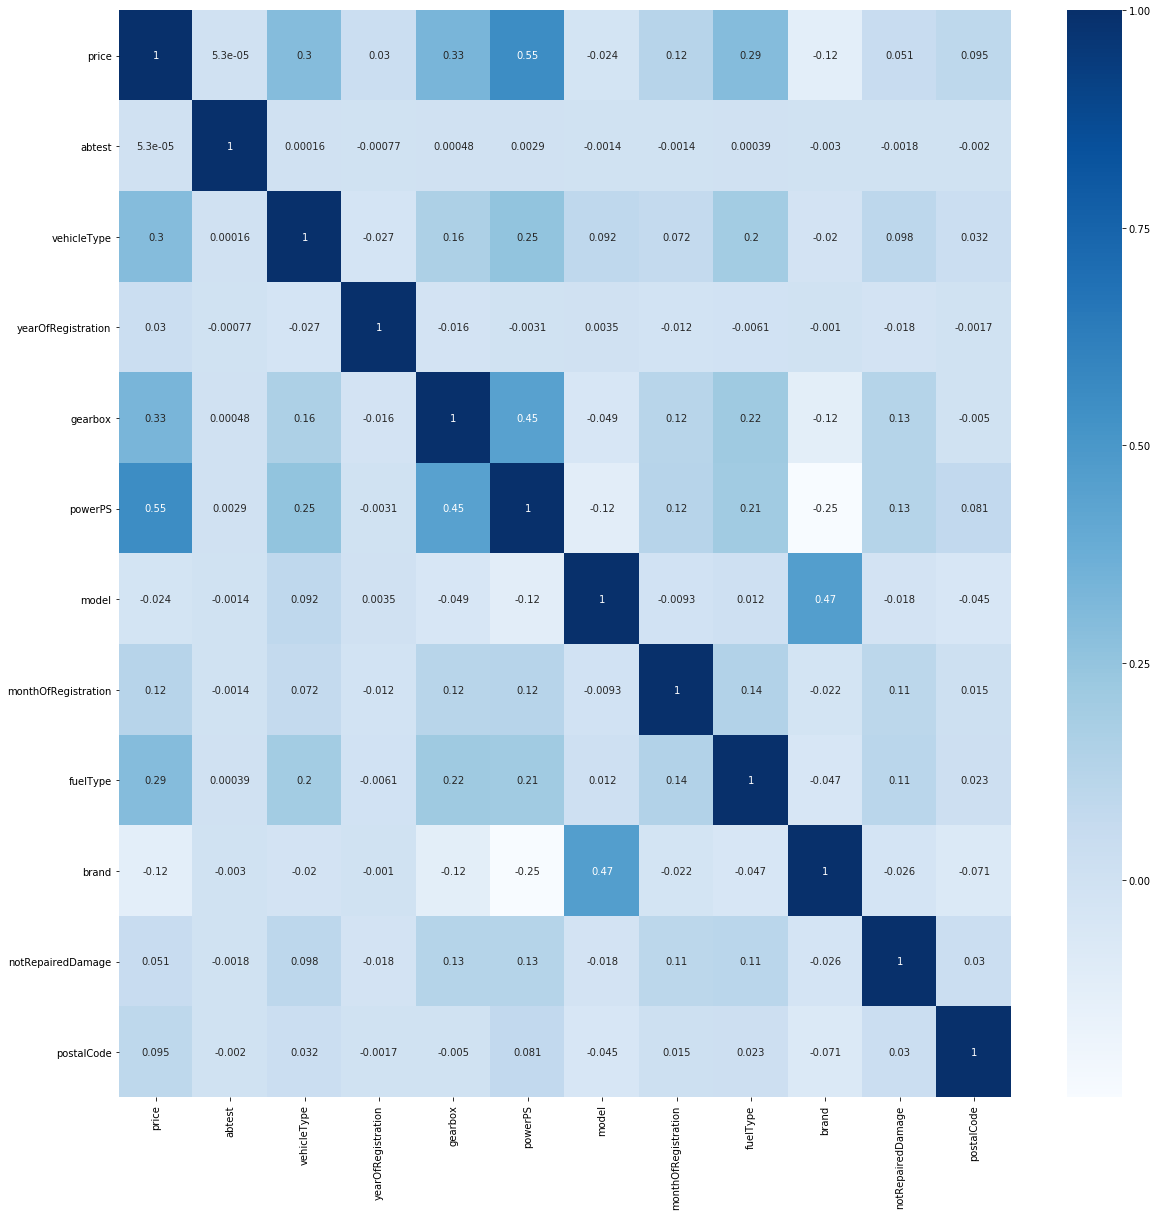

In [84]:
plt.figure(figsize = (20,20))
g = sns.heatmap(df.corr(), annot = True, cmap = "Blues")
g

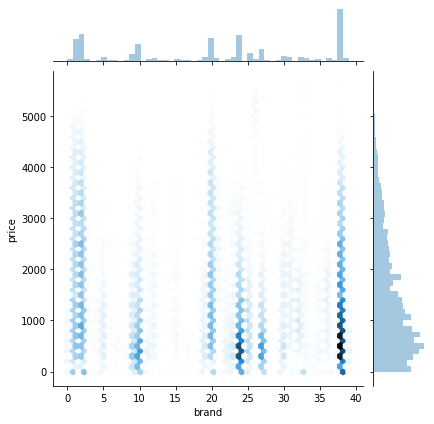

In [85]:
sns.jointplot(x = 'brand', y = 'price',kind = 'hex', data = df)

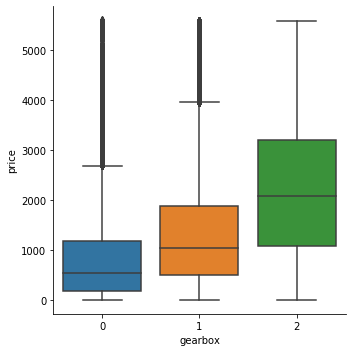

In [86]:
sns.catplot(x = 'gearbox', y = 'price',kind = 'box', data = df)

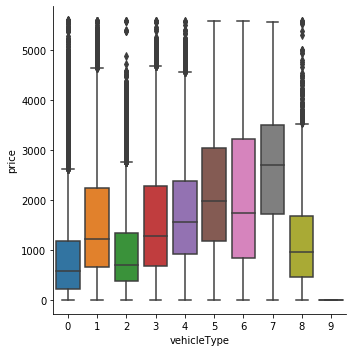

In [87]:
sns.catplot(x = 'vehicleType', y = 'price',kind = 'box', data = df)

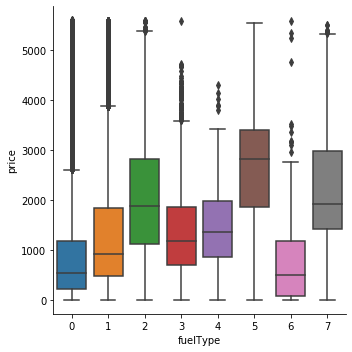

In [88]:
sns.catplot(x = 'fuelType', y = 'price',kind = 'box', data = df)

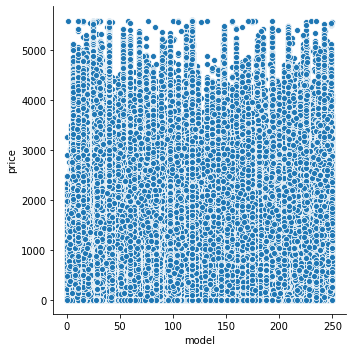

In [89]:
sns.relplot(x = 'model', y = 'price', data = df)

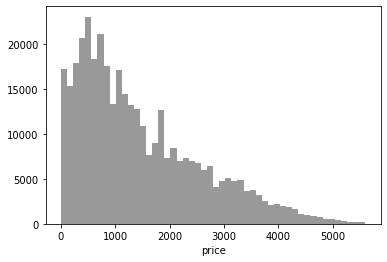

In [90]:
sns.distplot(df.price, kde = False, color = 'black')

In [91]:
y = np.array(df['price'])
y = y.reshape(-1,1)

In [92]:
X = df.iloc[:, df.columns != 'price']

In [ ]:
score_linear = cross_val_score(LinearRegression(), X, y, cv=5)
score_linear

In [93]:
score_lasso = cross_val_score(Lasso(), X, y, cv = 5)
score_lasso

array([0.53018135, 0.53223175, 0.5294138 , 0.527657  , 0.52594718])

In [94]:
score_ridge = cross_val_score(Ridge(), X, y, cv = 5)
score_ridge

array([0.53018258, 0.53220474, 0.52944962, 0.52769802, 0.52592526])

In [ ]:
score_nb = cross_val_score(GaussianNB(), X, y, cv = 5)
score_nb

In [98]:
score_dtc = cross_val_score(DecisionTreeClassifier(), X, y, cv = 5)
score_dtc

MemoryError: could not allocate 876871680 bytes

In [ ]:
score_rfc = cross_val_score(RandomForestClassifier(), X, y, cv = 5)
score_rfc